<a href="https://colab.research.google.com/github/misqualzarabi/DS-Unit-4-Sprint-1-NLP/blob/main/Text_data_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

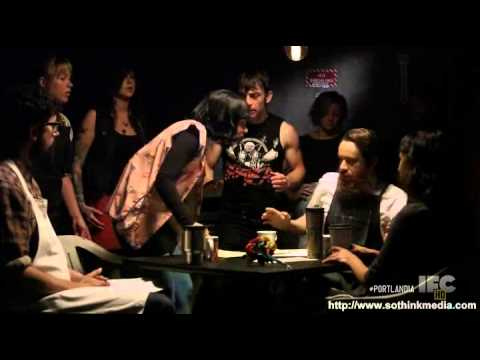

In [ ]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [ ]:
%pwd

'/content'

In [3]:
!python -m spacy download en_core_web_lg  #after running this command, it is neessary to restart the runtime to download ('en_core_web_lag')

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/misqualzarabi/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [2]:
shops.shape

(7616, 3)

In [3]:
shops['star_rating'].value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

In [4]:
# How can we count the raw text?
shops['full_review_text'].value_counts()[:5]

 10/6/2016 First to Review The Factory is AWESOME! What a great spot! I had the chicken and waffles (new take, but I now have cravings for them!), the homemade Poptart was so fun and such a delight. In terms of beverages got the drink with the chicory in it (I'm a big chicory fan) and it was perfect!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [5]:
import re
text = shops['full_review_text'][0]
sample_token = re.sub('[^a-zA-Z 0-9]', '', text)
sample_token

' 11252016 1 checkin Love love loved the atmosphere Every corner of the coffee shop had its own style and there were swings I ordered the matcha latte and it was muy fantastico Ordering and getting my drink were pretty streamlined I ordered on an iPad which included all beverage selections that ranged from coffee to wine desired level of sweetness and a checkout system I got my latte within minutes  I was hoping for a typical heart or feather on my latte but found myself listing out all the possibilities of what the art may be Any ideas '

In [ ]:
#!pip install squarify

In [ ]:
# Base
##from collections import Counter
#import re
 
#import pandas as pd

# Plotting
#import squarify
#import matplotlib.pyplot as plt
#import seaborn as sns

# NLP Libraries
#import spacy
#from spacy.tokenizer import Tokenizer
#from nltk.stem import PorterStemmer

In [ ]:
#nlp = spacy.load("en_core_web_lg")

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [6]:
import spacy
from spacy.tokenizer import Tokenizer


In [7]:
nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

In [8]:
#Tokenizer pipe
tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [9]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[ , 11/25/2016, 1, check-in, Love, love, loved..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[ , 12/2/2016, Listed, in, Date, Night:, Austi..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"[ , 11/30/2016, 1, check-in, Listed, in, Brunc..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,"[ , 11/25/2016, Very, cool, decor!, Good, drin..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,"[ , 12/3/2016, 1, check-in, They, are, located..."


In [10]:
#get rating as float so we can filter on good(4-5) and bad(1-3)

star_rating_floats = lambda x: float(x[:4].strip())
shops['rating'] = shops['star_rating'].apply(star_rating_floats)
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens,rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[ , 11/25/2016, 1, check-in, Love, love, loved...",5.0
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[ , 12/2/2016, Listed, in, Date, Night:, Austi...",4.0
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"[ , 11/30/2016, 1, check-in, Listed, in, Brunc...",4.0
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,"[ , 11/25/2016, Very, cool, decor!, Good, drin...",2.0
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,"[ , 12/3/2016, 1, check-in, They, are, located...",4.0


In [11]:
from collections import Counter

In [12]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [13]:
word_counts = count(shops['tokens'])
word_counts.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
75,the,6520,27779,1.0,0.034334,0.034334,0.856092
13,and,6804,25748,2.0,0.031824,0.066157,0.893382
58,,7616,22606,3.0,0.027940,0.094097,1.000000
61,a,6181,22085,4.0,0.027296,0.121394,0.811581
31,I,5469,19780,5.0,0.024447,0.145841,0.718093


Add stop words to get a better representation:



In [14]:
nlp.Defaults.stop_words  #to see the default stop words stored in nlp

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [15]:
# update the tokens to not include stop words
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['tokens'] = tokens


In [16]:
# get the word counts for new tokens without stop words
word_counts = count(shops['tokens'])
word_counts.sort_values(by='pct_total', ascending=False).head(15)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
34,,7616,22606,1.0,0.053592,0.053592,1.000000
21,coffee,4210,8058,2.0,0.019103,0.072695,0.552784
82,place,3029,4264,3.0,0.010109,0.082803,0.397715
153,great,2438,3250,4.0,0.007705,0.090508,0.320116
273,it's,2061,3117,5.0,0.007389,0.097897,0.270614
169,like,2034,2902,6.0,0.006880,0.104777,0.267069
177,good,2084,2779,7.0,0.006588,0.111365,0.273634
36,1,1998,2035,8.0,0.004824,0.116190,0.262342
24,check-in,1957,1961,9.0,0.004649,0.120839,0.256959
14,love,1434,1806,10.0,0.004281,0.125120,0.188288


In [17]:
#there aare more stop words that we can add to make it better
STOP_WORDS = nlp.Defaults.stop_words.union(['place', "it's", '1', 'check_in', "i'm", "i've", ""])

In [18]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [19]:
#get the new word counts
word_counts = count(shops['tokens'])
word_counts.head(15)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
34,,7616,22606,1.0,0.053592,0.053592,1.000000
21,coffee,4210,8058,2.0,0.019103,0.072695,0.552784
82,place,3029,4264,3.0,0.010109,0.082803,0.397715
153,great,2438,3250,4.0,0.007705,0.090508,0.320116
273,it's,2061,3117,5.0,0.007389,0.097897,0.270614
169,like,2034,2902,6.0,0.006880,0.104777,0.267069
177,good,2084,2779,7.0,0.006588,0.111365,0.273634
36,1,1998,2035,8.0,0.004824,0.116190,0.262342
24,check-in,1957,1961,9.0,0.004649,0.120839,0.256959
14,love,1434,1806,10.0,0.004281,0.125120,0.188288


In [20]:
# there are still more words that dont really apply . Maybe we should use lemmatization

#function to get lemmas of text

def get_lemmas(text):

    lemmas = []
  
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [21]:
shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)


In [22]:
#get the new word counts
word_counts = count(shops['tokens'])
word_counts.head(15)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
34,,7616,22606,1.0,0.053592,0.053592,1.000000
21,coffee,4210,8058,2.0,0.019103,0.072695,0.552784
82,place,3029,4264,3.0,0.010109,0.082803,0.397715
153,great,2438,3250,4.0,0.007705,0.090508,0.320116
273,it's,2061,3117,5.0,0.007389,0.097897,0.270614
169,like,2034,2902,6.0,0.006880,0.104777,0.267069
177,good,2084,2779,7.0,0.006588,0.111365,0.273634
36,1,1998,2035,8.0,0.004824,0.116190,0.262342
24,check-in,1957,1961,9.0,0.004649,0.120839,0.256959
14,love,1434,1806,10.0,0.004281,0.125120,0.188288


In [23]:
# we still have a lot of words that don't necessarily feel like belong
STOP_WORDS = nlp.Defaults.stop_words.union(['place', "it's", '1', 'check_in', "i'm", "i've", "", "-", "got", 'coffee', 'austin'])

In [24]:
#get the new tokens without the new stop_words

tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [25]:
#get the new word counts
word_counts = count(shops['tokens'])
word_counts.head(15)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
34,,7616,22606,1.0,0.053592,0.053592,1.000000
21,coffee,4210,8058,2.0,0.019103,0.072695,0.552784
82,place,3029,4264,3.0,0.010109,0.082803,0.397715
153,great,2438,3250,4.0,0.007705,0.090508,0.320116
273,it's,2061,3117,5.0,0.007389,0.097897,0.270614
169,like,2034,2902,6.0,0.006880,0.104777,0.267069
177,good,2084,2779,7.0,0.006588,0.111365,0.273634
36,1,1998,2035,8.0,0.004824,0.116190,0.262342
24,check-in,1957,1961,9.0,0.004649,0.120839,0.256959
14,love,1434,1806,10.0,0.004281,0.125120,0.188288


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [26]:
!pip install squarify

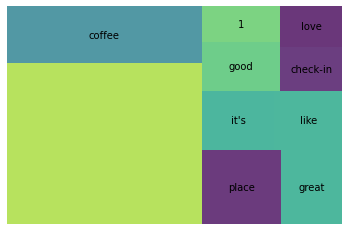

In [27]:
# visualize before stop words are taken into consideration

import squarify
import matplotlib.pyplot as plt

wc_top10 = word_counts[word_counts['rank'] <= 10]
 
squarify.plot(sizes=wc_top10['pct_total'], label=wc_top10['word'], alpha=.8 )

plt.axis('off')
plt.show()

In [28]:
#lets split dataframe into two subsets

good_ratings = shops[shops['rating'] >= 4]
bad_ratings = shops[shops['rating'] <= 3]


In [29]:
#word_counts for good_rating

good_wc = count(good_ratings['tokens'])
good_wc.head(15)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
34,,6140,17766,1.0,0.054043,0.054043,1.000000
21,coffee,3383,6421,2.0,0.019532,0.073575,0.550977
82,place,2432,3389,3.0,0.010309,0.083884,0.396091
153,great,2174,2902,4.0,0.008828,0.092712,0.354072
242,it's,1647,2500,5.0,0.007605,0.100316,0.268241
330,good,1643,2180,6.0,0.006631,0.106948,0.267590
231,like,1486,2068,7.0,0.006291,0.113238,0.242020
36,1,1621,1649,8.0,0.005016,0.118255,0.264007
14,love,1263,1604,9.0,0.004879,0.123134,0.205700
24,check-in,1598,1602,10.0,0.004873,0.128007,0.260261


In [30]:
#word_counts for bad rating

bad_wc = count(bad_ratings['tokens'])
bad_wc.head(15)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
29,,1476,4840,1.0,0.051999,0.051999,1.000000
11,coffee,827,1637,2.0,0.017587,0.069586,0.560298
64,place,597,875,3.0,0.009401,0.078987,0.404472
6,like,548,834,4.0,0.008960,0.087947,0.371274
208,it's,414,617,5.0,0.006629,0.094576,0.280488
19,good,441,599,6.0,0.006435,0.101011,0.298780
209,don't,340,430,7.0,0.004620,0.105631,0.230352
179,i'm,305,422,8.0,0.004534,0.110164,0.206640
113,1,377,386,9.0,0.004147,0.114311,0.255420
136,food,266,369,10.0,0.003964,0.118276,0.180217


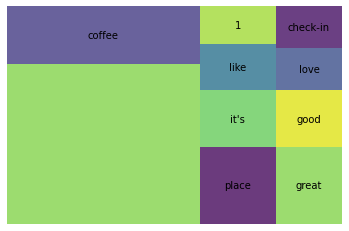

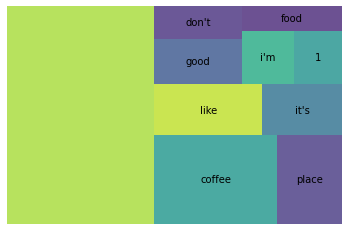

In [31]:
# visualize the ifference between good and bad ratings

good_top10 = good_wc[good_wc['rank'] <= 10]

squarify.plot(sizes=good_top10['pct_total'], label=good_top10['word'], alpha=.8 )
plt.axis('off')
plt.show()

bad_top10 = bad_wc[bad_wc['rank'] <= 10]

squarify.plot(sizes=bad_top10['pct_total'], label=bad_top10['word'], alpha=.8 )
plt.axis('off')
plt.show()


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

